In [1]:
import numpy as np
import pandas as pd
import os
import string
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df_churn=pd.read_csv(r'C:\Users\hp\Desktop\Winter_22\ml\datasets\Telco-Customer-Churn.csv')
df_churn.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [13]:
df_churn.shape

(7043, 21)

In [14]:
df_churn.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [15]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
df_churn.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [17]:
df_churn['TotalCharges']=df_churn.TotalCharges.replace(' ',np.nan)
df_churn.dropna(inplace=True)
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [18]:
df_churn['TotalCharges']=df_churn['TotalCharges'].astype(float)

replace_cols=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for col in replace_cols:
    df_churn[col]=df_churn[col].replace('No internet service','No')

    
cat_cols=['Partner','Dependents','PhoneService','PaperlessBilling','OnlineSecurity','OnlineBackup',
          'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Churn']

for col in cat_cols:
    df_churn[col]=df_churn[col].replace({"Yes":1,"No":0})


In [19]:
df_churn['gender']=df_churn['gender'].replace({"Female":1,"Male":0})
df_churn.head(10)

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       1              0        1           0       1   
1  5575-GNVDE       0              0        0           0      34   
2  3668-QPYBK       0              0        0           0       2   
3  7795-CFOCW       0              0        0           0      45   
4  9237-HQITU       1              0        0           0       2   
5  9305-CDSKC       1              0        0           0       8   
6  1452-KIOVK       0              0        0           1      22   
7  6713-OKOMC       1              0        0           0      10   
8  7892-POOKP       1              0        1           0      28   
9  6388-TABGU       0              0        0           1      62   

   PhoneService     MultipleLines InternetService  OnlineSecurity  ...  \
0             0  No phone service             DSL               0  ...   
1             1                No             DSL               1  ...   
2             1                No             DSL               1  ...   
3             0  No phone service             DSL               1  ...   
4             1                No     Fiber optic               0  ...   
5             1               Yes     Fiber optic               0  ...   
6             1               Yes     Fiber optic               0  ...   
7             0  No phone service             DSL               1  ...   
8             1               Yes     Fiber optic               0  ...   
9             1                No             DSL               1  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                 0            0            0                0   
1                 1            0            0                0   
2                 0            0            0                0   
3                 1            1            0                0   
4                 0            0            0                0   
5                 1            0            1                1   
6                 0            0            1                0   
7                 0            0            0                0   
8                 1            1            1                1   
9                 0            0            0                0   

         Contract PaperlessBilling              PaymentMethod MonthlyCharges  \
0  Month-to-month                1           Electronic check          29.85   
1        One year                0               Mailed check          56.95   
2  Month-to-month                1               Mailed check          53.85   
3        One year                0  Bank transfer (automatic)          42.30   
4  Month-to-month                1           Electronic check          70.70   
5  Month-to-month                1           Electronic check          99.65   
6  Month-to-month                1    Credit card (automatic)          89.10   
7  Month-to-month                0               Mailed check          29.75   
8  Month-to-month                1           Electronic check         104.80   
9        One year                0  Bank transfer (automatic)          56.15   

   TotalCharges  Churn  
0         29.85      0  
1       1889.50      0  
2        108.15      1  
3       1840.75      0  
4        151.65      1  
5        820.50      1  
6       1949.40      0  
7        301.90      0  
8       3046.05      1  
9       3487.95      0  

[10 rows x 21 columns]

In [20]:
df_churn['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

In [21]:
def tenure_intervals(df_churn):
    if (df_churn['tenure']<=12):
        return 'ten_le_12'
    if (df_churn['tenure']>12 and df_churn['tenure']<=24) :
        return 'ten_12-24'
    if (df_churn['tenure']>24 and df_churn['tenure']<=48) :
        return 'ten_24-48'
    if (df_churn['tenure']>48 and df_churn['tenure']<=60) :
        return 'ten_48-60'
    if (df_churn['tenure']>60) :
        return 'ten_ge_60'
df_churn["tenure_group"] = df_churn.apply(lambda df_churn:tenure_intervals(df_churn),
                                      axis = 1)
df_churn.head(3)

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       1              0        1           0       1   
1  5575-GNVDE       0              0        0           0      34   
2  3668-QPYBK       0              0        0           0       2   

   PhoneService     MultipleLines InternetService  OnlineSecurity  ...  \
0             0  No phone service             DSL               0  ...   
1             1                No             DSL               1  ...   
2             1                No             DSL               1  ...   

   TechSupport  StreamingTV  StreamingMovies        Contract  \
0            0            0                0  Month-to-month   
1            0            0                0        One year   
2            0            0                0  Month-to-month   

   PaperlessBilling     PaymentMethod  MonthlyCharges TotalCharges  Churn  \
0                 1  Electronic check           29.85        29.85      0   
1                 0      Mailed check           56.95      1889.50      0   
2                 1      Mailed check           53.85       108.15      1   

   tenure_group  
0     ten_le_12  
1     ten_24-48  
2     ten_le_12  

[3 rows x 22 columns]

In [22]:
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

In [23]:
label=df_churn.Churn.value_counts().keys()
values=df_churn.Churn.value_counts().values.tolist()

trace=go.Pie(labels=label,values=values,hoverinfo='label+value+text',hole=0.5,rotation=90)
layout=go.Layout(title='Customer_attrition',plot_bgcolor="rgb(243,243,243)",paper_bgcolor="rgb(243,243,243)")
fig=go.Figure(data=[trace],layout=layout)
py.iplot(fig)

In [24]:
nochurn=df_churn[df_churn.Churn==0]
churn=df_churn[df_churn.Churn==1]

In [25]:
def pie_plot(column):
    trace1=go.Pie(values=churn[column].value_counts().values.tolist(),
                 labels=churn[column].value_counts().keys().tolist(),
                  hoverinfo='label+percent+name',
                  name='Churn Customers',
                  hole=0.6
                 )
    
    trace2=go.Pie(values=nochurn[column].value_counts().values.tolist(),
                 labels=nochurn[column].value_counts().keys().tolist(),
                  hoverinfo='label+percent+name',
                  name='Non-Churn Customers',
                  hole=0.6
                 )
    layout=go.Layout(title=column + 'distribution in customer attrition')
    
    data=[trace1,trace2]
    
    fig=go.Figure(data=data,layout=layout)
    py.iplot(fig)

In [26]:
cat_cols=df_churn.nunique()[df_churn.nunique()<6].keys().tolist()
target_col=["Churn"]
Id_col=['customerID']
cat_cols=[cols for cols in cat_cols if cols not in target_col]

In [27]:
for x in cat_cols:
    pie_plot(x)

In [28]:
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = nochurn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)

In [29]:
for x in cat_cols:
    histogram(x)

In [30]:
df_tenure_group=df_churn[['MonthlyCharges','TotalCharges']].groupby(df_churn.tenure_group).agg('sum').unstack()
df_tenure_group

                tenure_group
MonthlyCharges  ten_12-24         62829.85
                ten_24-48        105093.30
                ten_48-60         58698.25
                ten_ge_60        106865.45
                ten_le_12        122174.15
TotalCharges    ten_12-24       1153287.70
                ten_24-48       3810380.35
                ten_48-60       3201646.30
                ten_ge_60       7289202.45
                ten_le_12        601651.90
dtype: float64

In [31]:
df_tenure_group_churn=df_churn[['MonthlyCharges','TotalCharges']].groupby(df_churn.Churn).agg('sum').unstack()
df_tenure_group_churn

                Churn
MonthlyCharges  0          316530.15
                1          139130.85
TotalCharges    0        13193241.80
                1         2862926.90
dtype: float64

<IPython.core.display.Javascript object>


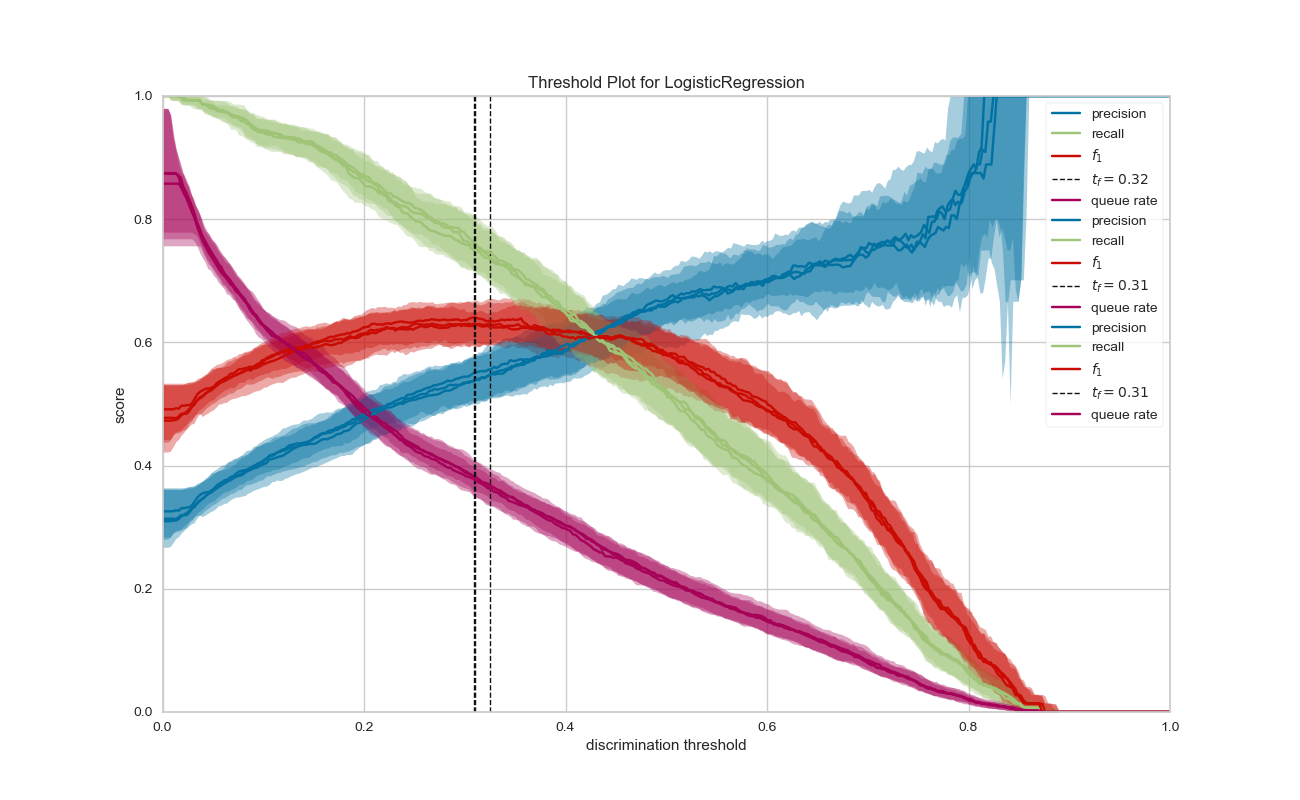

In [32]:
x=df_churn[df_churn['tenure_group']=='ten_le_12']['MonthlyCharges']
y=df_churn[df_churn['tenure_group']=='ten_le_12']['TotalCharges']
plt.figure(figsize=(13,8),dpi=100)
plt.scatter(x,y)

In [33]:
def tenure_scatter_plot(tenure_group,color):
    trace=go.Scatter(x=df_churn[df_churn['tenure_group']==tenure_group]['MonthlyCharges'],
                    y=df_churn[df_churn['tenure_group']==tenure_group]['TotalCharges'],
                    mode = "markers",marker = dict(line = dict(color = "black",
                                                                   width = .2),
                                                       size = 4 , color = color,
                                                       symbol = "diamond-dot",
                                                      ),
                        name = tenure_group,
                        opacity = .9)
                    
    return trace

In [34]:
def churn_scatter_plot(churn,color):
    trace=go.Scatter(x=df_churn[df_churn['Churn']==churn]['MonthlyCharges'],
                    y=df_churn[df_churn['Churn']==churn]['TotalCharges'],
                     mode = "markers",marker = dict(line = dict(color = "black",
                                                                   width = .2),
                                                       size = 4 , color = color,
                                                       symbol = "diamond-dot",
                                                      ),
                        name = churn,
                        opacity = .9
                       )
                    
    return trace

In [35]:
trace1=churn_scatter_plot(df_churn['Churn'].unique().tolist()[0],'red')
trace2=churn_scatter_plot(df_churn['Churn'].unique().tolist()[1],'blue')
trace_churn=[trace1,trace2]
trace_churn

[Scatter({
     'marker': {'color': 'red', 'line': {'color': 'black', 'width': 0.2}, 'size': 4, 'symbol': 'diamond-dot'},
     'mode': 'markers',
     'name': '0',
     'opacity': 0.9,
     'x': array([ 29.85,  56.95,  42.3 , ..., 103.2 ,  29.6 , 105.65]),
     'y': array([  29.85, 1889.5 , 1840.75, ..., 7362.9 ,  346.45, 6844.5 ])
 }),
 Scatter({
     'marker': {'color': 'blue', 'line': {'color': 'black', 'width': 0.2}, 'size': 4, 'symbol': 'diamond-dot'},
     'mode': 'markers',
     'name': '1',
     'opacity': 0.9,
     'x': array([ 53.85,  70.7 ,  99.65, ...,  75.75, 102.95,  74.4 ]),
     'y': array([ 108.15,  151.65,  820.5 , ...,   75.75, 6886.25,  306.6 ])
 })]

In [36]:
print(df_churn['tenure_group'].unique().tolist())
trace3 = tenure_scatter_plot("ten_le_12","#FF3300")
trace4 = tenure_scatter_plot("ten_24-48","#6666FF")
trace5 = tenure_scatter_plot("ten_12-24","#99FF00")
trace6 = tenure_scatter_plot("ten_ge_60","#996600")
trace7 = tenure_scatter_plot("ten_ge_60","grey")
trace_tenure=[trace3,trace4,trace5,trace6,trace7]

['ten_le_12', 'ten_24-48', 'ten_12-24', 'ten_ge_60', 'ten_48-60']


In [37]:
def layout_title(title) :
    layout = go.Layout(dict(title = title,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "Monthly charges",
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "Total Charges",
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            height = 600
                           )
                      )
    return layout

layout1  = layout_title("Monthly Charges & Total Charges by Tenure group")
layout2  = layout_title("Monthly Charges & Total Charges by Churn group")
fig1 = go.Figure(data = trace_tenure,layout = layout1)
fig2 = go.Figure(data = trace_churn,layout = layout2)
py.iplot(fig1)
py.iplot(fig2)

In [38]:
avg_tgc=df_churn.groupby(['tenure_group','Churn'])[['TotalCharges','MonthlyCharges']].mean().reset_index()
def mean_charges(column,aggregate):
    trace=go.Bar(
        x=avg_tgc[avg_tgc['Churn']==aggregate]['tenure_group'],
        y=avg_tgc[avg_tgc['Churn']==aggregate][column],
        name=aggregate,marker=dict(line=dict(width=1)),text='Churn'
    )
    return trace
def layout_plot(title,xaxis,yaxis):
    layout=go.Layout(
    dict(title=title,plot_bgcolor="rgb(243,243,243)",paper_bgcolor="rgb(243,243,243)",xaxis=dict(gridcolor="rgb(255,255,255)",title=xaxis),
         yaxis=dict(gridcolor="rgb(255,255,255)",title=yaxis),))
    return layout

In [39]:
trace1  = mean_charges("MonthlyCharges",1)
trace2  = mean_charges("MonthlyCharges",0)
layout1 = layout_plot("Average Monthly Charges by Tenure groups",
                      "Tenure group","Monthly Charges")
data1   = [trace1,trace2]
fig1    = go.Figure(data=data1,layout=layout1)

#plot2 - mean total charges by tenure groups
trace3  = mean_charges("TotalCharges",1)
trace4  = mean_charges("TotalCharges",0)
layout2 = layout_plot("Average Total Charges by Tenure groups",
                      "Tenure group","Total Charges")
data2   = [trace3,trace4]
fig2    = go.Figure(data=data2,layout=layout2)

py.iplot(fig1)
py.iplot(fig2)

In [40]:
df_churn.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
tenure_group           5
dtype: int64

In [41]:
#df_churn.drop('tenure',inplace=True,axis=1)

In [42]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   int64  
 10  OnlineBackup      7032 non-null   int64  
 11  DeviceProtection  7032 non-null   int64  
 12  TechSupport       7032 non-null   int64  
 13  StreamingTV       7032 non-null   int64  
 14  StreamingMovies   7032 non-null   int64  
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   int64  


In [43]:
Id_col     = ['customerID']
target_col = ["Churn"]

In [44]:
uni=df_churn.nunique()[df_churn.nunique()<6].keys().tolist()
uni

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'tenure_group']

In [45]:
a=[x for x in df_churn.columns if x not in uni]
a

['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [46]:
cat_cols   = df_churn.nunique()[df_churn.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'tenure_group']

In [47]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


num_cols   = [x for x in df_churn.columns if x not in cat_cols + target_col + Id_col]
print(num_cols)
#Binary columns with 2 values
bin_cols   = df_churn.nunique()[df_churn.nunique() == 2].keys().tolist()
print(bin_cols)
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]
print(multi_cols)
#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    df_churn[i] = le.fit_transform(df_churn[i])
    #print(df_churn[i])
    
#Duplicating columns for multi value columns
df_churn = pd.get_dummies(data = df_churn,columns = multi_cols )
print(df_churn.head(3))
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(df_churn[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_telcom_og = df_churn.copy()
df_churn = df_churn.drop(columns = num_cols,axis = 1)
df_churn = df_churn.merge(scaled,left_index=True,right_index=True,how = "left")
print(df_churn.head(3))
df_churn.columns
#print(num_cols,multi_cols)
#telcom.shape

['tenure', 'MonthlyCharges', 'TotalCharges']
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod', 'tenure_group']
   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       1              0        1           0       1   
1  5575-GNVDE       0              0        0           0      34   
2  3668-QPYBK       0              0        0           0       2   

   PhoneService  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0             0               0             1                 0  ...   
1             1               1             0                 1  ...   
2             1               1             1                 0  ...   

   Contract_Two year  PaymentMethod_Bank transfer (automatic)  \
0                  0                     

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'Churn', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure_group_ten_12-24', 'tenure_group_ten_24-48',
       'tenure_group_ten_48-60', 'tenure_group_ten_ge_60',
       'tenure_group_ten_le_12', 'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [48]:
df_telcom_og.head()
summary=df_telcom_og[[x for x in df_telcom_og.columns if x not in Id_col]].describe().transpose().reset_index()
summary=summary.rename(columns={'index':'feature'})
summary=np.around(summary,3)
val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]
trace=go.Table(header = dict(values = summary.columns.tolist(),
                                line = dict(color = ['#506784']),
                                fill = dict(color = ['#119DFF']),
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ['#506784']),
                                fill = dict(color = ["lightgrey",'#F5F8FF'])
                               ),
                  columnwidth = [200,60,100,100,60,60,80,80,80])
layout=go.Layout(title='Summary of Features')
fig=go.Figure(data=[trace],layout=layout)
py.iplot(fig)

In [49]:
correlation=df_churn.corr()
correlation

gender  SeniorCitizen   Partner  \
gender                                   1.000000       0.001819  0.001379   
SeniorCitizen                            0.001819       1.000000  0.016957   
Partner                                  0.001379       0.016957  1.000000   
Dependents                              -0.010349      -0.210550  0.452269   
PhoneService                             0.007515       0.008392  0.018397   
OnlineSecurity                           0.016328      -0.038576  0.143346   
OnlineBackup                             0.013093       0.066663  0.141849   
DeviceProtection                         0.000807       0.059514  0.153556   
TechSupport                              0.008507      -0.060577  0.120206   
StreamingTV                              0.007124       0.105445  0.124483   
StreamingMovies                          0.010105       0.119842  0.118108   
PaperlessBilling                         0.011902       0.156258 -0.013957   
Churn                                    0.008545       0.150541 -0.149982   
MultipleLines_No                        -0.004335      -0.136377 -0.130028   
MultipleLines_No phone service          -0.007515      -0.008392 -0.018397   
MultipleLines_Yes                        0.008883       0.142996  0.142561   
InternetService_DSL                     -0.007584      -0.108276 -0.001043   
InternetService_Fiber optic              0.011189       0.254923  0.001235   
InternetService_No                      -0.004745      -0.182519 -0.000286   
Contract_Month-to-month                  0.003251       0.137752 -0.280202   
Contract_One year                       -0.007755      -0.046491  0.083067   
Contract_Two year                        0.003603      -0.116205  0.247334   
PaymentMethod_Bank transfer (automatic)  0.015973      -0.016235  0.111406   
PaymentMethod_Credit card (automatic)   -0.001632      -0.024359  0.082327   
PaymentMethod_Electronic check          -0.000844       0.171322 -0.083207   
PaymentMethod_Mailed check              -0.013199      -0.152987 -0.096948   
tenure_group_ten_12-24                   0.000649       0.001860 -0.048481   
tenure_group_ten_24-48                   0.010516       0.020383  0.028468   
tenure_group_ten_48-60                   0.004319       0.014186  0.105341   
tenure_group_ten_ge_60                  -0.016279      -0.002407  0.280353   
tenure_group_ten_le_12                   0.001050      -0.027713 -0.305061   
tenure                                  -0.018568      -0.004482  0.037100   
MonthlyCharges                          -0.006789      -0.001729 -0.003828   
TotalCharges                            -0.021080      -0.005051  0.026933   

                                         Dependents  PhoneService  \
gender                                    -0.010349      0.007515   
SeniorCitizen                             -0.210550      0.008392   
Partner                                    0.452269      0.018397   
Dependents                                 1.000000     -0.001078   
PhoneService                              -0.001078      1.000000   
OnlineSecurity                             0.080786     -0.091676   
OnlineBackup                               0.023639     -0.052133   
DeviceProtection                           0.013900     -0.070076   
TechSupport                                0.063053     -0.095138   
StreamingTV                               -0.016499     -0.021383   
StreamingMovies                           -0.038375     -0.033477   
PaperlessBilling                          -0.110131      0.016696   
Churn                                     -0.163128      0.011691   
MultipleLines_No                           0.023388      0.315218   
MultipleLines_No phone service             0.001078     -1.000000   
MultipleLines_Yes                         -0.024307      0.279530   
InternetService_DSL                        0.051593     -0.452255   
InternetService_Fiber optic               -0.164101      0.290183   
I

In [50]:
label=correlation.columns.tolist()
label

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'tenure_group_ten_12-24',
 'tenure_group_ten_24-48',
 'tenure_group_ten_48-60',
 'tenure_group_ten_ge_60',
 'tenure_group_ten_le_12',
 'tenure',
 'MonthlyCharges',
 'TotalCharges']

In [51]:
corr_aray=np.array(correlation)
corr_aray

array([[ 1.        ,  0.00181939,  0.00137905, ..., -0.01856802,
        -0.00678948, -0.02107975],
       [ 0.00181939,  1.        ,  0.01695661, ..., -0.00448244,
        -0.00172948, -0.00505124],
       [ 0.00137905,  0.01695661,  1.        , ...,  0.03710008,
        -0.00382784,  0.02693303],
       ...,
       [-0.01856802, -0.00448244,  0.03710008, ...,  1.        ,
         0.2474643 ,  0.82595758],
       [-0.00678948, -0.00172948, -0.00382784, ...,  0.2474643 ,
         1.        ,  0.6514682 ],
       [-0.02107975, -0.00505124,  0.02693303, ...,  0.82595758,
         0.6514682 ,  1.        ]])

In [52]:
trace=go.Heatmap(x=label,y=label,z=corr_aray)
layout=go.Layout(title='Correlation Matrix')
fig=go.Figure(data=[trace],layout=layout)
py.iplot(fig)

In [58]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
df_churn.dropna(inplace=True)
X=df_churn[[i for i in df_churn.columns if i not in Id_col+target_col ]]
Y=df_churn[target_col+Id_col]


In [59]:
print(df_churn.isna().any())
#df_churn.to_csv(r'C:\Users\vivek\Desktop\df_churn.csv')

customerID                                 False
gender                                     False
SeniorCitizen                              False
Partner                                    False
Dependents                                 False
PhoneService                               False
OnlineSecurity                             False
OnlineBackup                               False
DeviceProtection                           False
TechSupport                                False
StreamingTV                                False
StreamingMovies                            False
PaperlessBilling                           False
Churn                                      False
MultipleLines_No                           False
MultipleLines_No phone service             False
MultipleLines_Yes                          False
InternetService_DSL                        False
InternetService_Fiber optic                False
InternetService_No                         False
Contract_Month-to-mo

In [60]:
X.isna().any()

gender                                     False
SeniorCitizen                              False
Partner                                    False
Dependents                                 False
PhoneService                               False
OnlineSecurity                             False
OnlineBackup                               False
DeviceProtection                           False
TechSupport                                False
StreamingTV                                False
StreamingMovies                            False
PaperlessBilling                           False
MultipleLines_No                           False
MultipleLines_No phone service             False
MultipleLines_Yes                          False
InternetService_DSL                        False
InternetService_Fiber optic                False
InternetService_No                         False
Contract_Month-to-month                    False
Contract_One year                          False
Contract_Two year   

In [61]:
principal_components=pca.fit_transform(X)
principal_components

array([[-2.02125995, -0.27581299],
       [-0.24146481, -0.44841363],
       [-1.60267427, -0.87166848],
       ...,
       [-1.67783978, -0.08590262],
       [-1.23325766, -1.6813671 ],
       [ 2.80433722,  0.34983555]])

In [62]:
pca_data=pd.DataFrame(principal_components,columns=['PC-1',"PC-2"])
pca_data=pca_data.merge(Y,left_index=True,right_index=True,how='left')
pca_data['Churn']=pca_data['Churn'].replace({1:"Churn",0:"Not Churn"})
pca_data.columns

Index(['PC-1', 'PC-2', 'Churn', 'customerID'], dtype='object')

In [63]:
def scatter_plot(target,color):
    trace=go.Scatter(x=pca_data[pca_data['Churn']==target]['PC-1'],
                     y=pca_data[pca_data['Churn']==target]['PC-2'],
                    name = target,mode = "markers",
                        marker = dict(color = color,
                                      line = dict(width = .5),
                                      symbol =  "diamond-open"),
                        text = ("Customer Id : " + 
                                pca_data[pca_data["Churn"] == target]['customerID'])
                     )
    return trace
layout=go.Layout(title='Visualizing the PCA components')
trace1=scatter_plot("Churn",'red')
trace2=scatter_plot("Not Churn",'royalblue')
trace=[trace1,trace2]
fig=go.Figure(data=trace,layout=layout)
py.iplot(fig)

In [64]:
bi_cs = df_churn.nunique()[df_churn.nunique() == 2].keys()
data_rp=df_churn[bi_cs]

def plot_radar(aggregate,title):
    df=data_rp[data_rp['Churn']==aggregate]
    df_x=df[bi_cs].sum().reset_index()
    df_x.columns=['features','Yes']
    df_x['No']=df.shape[0]-df_x['Yes']
    df_x=df_x[df_x['features']!='Churn']
    
    
    trace1=go.Scatterpolar(r=df_x['Yes'].values.tolist(),
                          theta=df_x.features.tolist(),
                          fill  = "toself",name = "count of 1's",
                             mode = "markers+lines",
                             marker = dict(size = 5))
    
    
    trace2=go.Scatterpolar(r=df_x['No'].values.tolist(),
                          theta=df_x.features.tolist(),
                          fill  = "toself",name = "count of 0's",
                             mode = "markers+lines",
                             marker = dict(size = 5))
    
    layout=go.Layout(title=title)
    data=[trace1,trace2]
    fig=go.Figure(data=data,layout=layout)
    py.iplot(fig)
    
    
plot_radar(1,'Churn Customers')
plot_radar(0,'Non Churn Customers')

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,make_scorer,f1_score

In [66]:
import statsmodels.api as sm
from yellowbrick.classifier import DiscriminationThreshold

In [67]:
train,test=train_test_split(df_churn,test_size=0.25,random_state=42)
train.shape,test.shape

((5265, 35), (1756, 35))

In [68]:
cols= [i for i in df_churn.columns if i not in Id_col + target_col]
X_train=train[cols]
X_test=test[cols]
y_train=train[target_col]
y_test=test[target_col]
X_train.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((5265, 33), (5265, 1), (1756, 33), (1756, 1))

In [76]:
import warnings
warnings.filterwarnings('ignore')

In [78]:
def churn_prediction(algorithm,X_train,X_test,y_train,y_test,cols,cf,threshold_plot):
    algorithm.fit(X_train,y_train)
    predict=algorithm.predict(X_test)
    probabilities=algorithm.predict_proba(X_test)
    
    if cf=="coefficients":
        coefficients=pd.DataFrame(algorithm.coef_.ravel())
    elif cf=="features":
        coefficients=pd.DataFrame(algorithm.feature_importances_)
        
    col_df=pd.DataFrame(cols)
    coef_summ=pd.merge(coefficients,col_df,left_index=True,right_index=True,how='left')
    coef_summ.columns=["coefficients","features"]
    coef_summ=coef_summ.sort_values(by='coefficients',ascending=True)
    
    
    print(algorithm)
    print("Classification_report    ",classification_report(y_test,predict))
    cm=confusion_matrix(y_test,predict)
    print("Confusion matrix     ",cm)
    print("Accuracy Score    ",accuracy_score(y_test,predict))
    model_roc_auc=roc_auc_score(y_test,predict)
    print("Area under Curve",model_roc_auc)
    fpr,tpr,thresholds=roc_curve(y_test,probabilities[:,1])
    
    
    trace1=go.Heatmap(z=cm,
                     x=['Not Churn','Churn'],
                     y=['Not Churn','Churn'],
                     name='Matrix',colorscale='Picnic',showscale=False)
    trace2=go.Scatter(x=fpr,y=tpr,
                     name="ROC" +str(model_roc_auc))
    trace3=go.Scatter(x=[0,1],y=[0,1])
    trace4=go.Bar(x=coef_summ['features'],y=coef_summ['coefficients'])
    
    fig=tls.make_subplots(rows=2,cols=2,specs=[[{},{}],[{'colspan': 2}, None]],
                         subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,2,1)
    
    fig['layout'].update(title='Model Performance')
    
    
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(X_train,y_train)
        visualizer.poof()
    
lr=LogisticRegression()
#y_train.info()
#print(y_train.isna().any())

#lr.fit(X_train,y_train)
churn_prediction(lr,X_train,X_test,y_train,y_test,cols,"coefficients",threshold_plot = True)


LogisticRegression()
Classification_report                   precision    recall  f1-score   support

           0       0.85      0.89      0.87      1323
           1       0.61      0.52      0.56       433

    accuracy                           0.80      1756
   macro avg       0.73      0.71      0.72      1756
weighted avg       0.79      0.80      0.80      1756

Confusion matrix      [[1181  142]
 [ 207  226]]
Accuracy Score     0.80125284738041
Area under Curve 0.7073040660965438
